# TP0 : Initiation à Python pour l'image

Pour la mise en pratique, nous utiliserons le langage Python qui permet une écriture aisée de la gestion d’images numériques, en s’appuyant sur les opérations très utiles des modules complémentaires comme **Numpy** et **Matplotlib**, que vous connaissez déjà, ainsi que **OpenCV**.

Dans ce premier TP, vous n'avez (presque) rien à coder jusqu'à la section **3.4**. Parcourez les différentes cellules contenant les fonctions de base des modules **OpenCV**, **Numpy** et **Matplotlib**.

Les exercices de **3.5** et **3.6** sont une introduction à la manipulation des tableaux Numpy dans le cadre du traitement d'images en niveaux de gris et en couleur.

## 1 Révision de Numpy

Comme vous avez vu dans la ressource de *Modélisation Mathématique*, Numpy est une bibliothèque pour Python spécialisée dans la manipulation des tableaux (array), pour nous essentiellement les vecteurs et les matrices.
Les tableaux “numpy” ne gère que les objets de même type.
Nous ne ferons pas ici une description détaillée de cette bibliothèque, mais nous allons illustrer sur un exemple les fonctions principales dont nous aurons besoin dans les TPs.

In [12]:
import numpy as np # np sera l’alias utilisé pour accéder aux fonctions de la bibliothèque numpy

In [13]:
# Création manuelle de la matrice de dimension 3 x 2
# | 1.2 2.5 |
# | 3.2 1.8 |
# | 1.1 4.3 |
a = np.array ([[1.2 ,2.5] ,[3.2 ,1.8] ,[1.1 ,4.3]]) # Noter le rôle des [[ ]] pour délimiter les lignes de la matrice

In [14]:
# Informations sur la structure :

# type de la structure
print ( type ( a ) ) # < class 'numpy.ndarray'>

# type des données
print ( a.dtype ) # float64

# nombre de dimensions
print ( a.ndim ) # 2 ( car c’est une matrice )

# nombre de lignes et colonnes, shape renvoie un tuple
print ( a.shape ) # (3 ,2) car 3 lignes et 2 colonnes

# nombre total de valeurs
print ( a.size ) # 6 , nb.lignes x nb.colonnes

# Affichage d’une matrice dans la console
print ( a )

<class 'numpy.ndarray'>
float64
2
(3, 2)
6
[[1.2 2.5]
 [3.2 1.8]
 [1.1 4.3]]


In [15]:
# Typage :

# création et typage implicite
a = np.array ([[1 ,2] ,[4 ,7]])
print ( a.dtype ) # int32

# création et typage explicite
a = np.array ([[1 ,2] ,[4 ,7]] , dtype = float )
print ( a.dtype ) # float64

int64
float64


In [16]:
# Création d’une matrice à partir d’une séquence de valeurs :

# création à partir d'une séquence
# Attention : les dimensions doivent être compatibles
a = np.arange(0,10).reshape(2,5) # arange() génère une séquence de valeurs, 0 à 9 ; reshape() se charge de les réorganiser 
# en une matrice de 2 lignes et de 5 colonnes.

# matrices de valeurs identiques
# ex. pour une initialisation avec des 0
a = np.zeros( shape =(2,4) )

# Redimensionnement :
# matrice de valeurs
a = np.array ([[1.2 ,2.5] ,[3.2 ,1.8] ,[1.1 ,4.3]])

# ajouter une ligne - fonctionne pour la concaténation de matrices
b = np.array ([[4.1 ,2.6]])
c = np.append (a ,b , axis =0)
print( c )

# ajouter une colonne
d = np.array ([[7.8] ,[6.1] ,[5.4]])
print ( np.append (a ,d , axis =1) )

# insertion
print ( np.insert (a ,1 ,b , axis =0) )

# suppression
print ( np.delete (a ,1 , axis =0) )

# modifier la dimension d’une matrice existante
# parcours les données lignes par ligne
h = np.resize (a , new_shape=(2 ,3) )
print (h)

[[1.2 2.5]
 [3.2 1.8]
 [1.1 4.3]
 [4.1 2.6]]
[[1.2 2.5 7.8]
 [3.2 1.8 6.1]
 [1.1 4.3 5.4]]
[[1.2 2.5]
 [4.1 2.6]
 [3.2 1.8]
 [1.1 4.3]]
[[1.2 2.5]
 [1.1 4.3]]
[[1.2 2.5 3.2]
 [1.8 1.1 4.3]]


In [17]:
# Extraction de valeurs ( accès indicé )
v = np.array([[1.2 ,2.5] ,[3.2 ,1.8] ,[1.1 ,4.3]])
# affichage de la structure dans son ensemble
print ( v )
# accès indicé - première valeur
print ( v[0 ,0]) # 1.2
# dernière valeur - noter l’utilisation de shape ( qui est un tuple )
print ( v[ v.shape[0] -1 , v.shape[1] -1]) # 4.3
# autre solution pour affichage de toutes les valeurs , notez le rôle des :
print ( v[: ,:])
# plage d’indices contigus : lignes 0 à 1 (2 non inclus), toutes les colonnes
print ( v[0:2 ,:])
# extrêmes, début à 2 ( non-inclus )
print ( v[:2 ,:])
# extrêmes, lignes 1 à dernière
print (v[1: ,:])
# indice négatif - dernière ligne et toutes les colonnes
print ( v[-1 ,:])
# indices négatifs - deux dernières lignes et toutes les colonnes
print ( v[-2: ,:])

[[1.2 2.5]
 [3.2 1.8]
 [1.1 4.3]]
1.2
4.3
[[1.2 2.5]
 [3.2 1.8]
 [1.1 4.3]]
[[1.2 2.5]
 [3.2 1.8]]
[[1.2 2.5]
 [3.2 1.8]]
[[3.2 1.8]
 [1.1 4.3]]
[1.1 4.3]
[[3.2 1.8]
 [1.1 4.3]]


In [18]:
# Parcours d’une matrice
s = 0.0
for i in range (0 , v.shape [0]) :
    for j in range (0 , v.shape [1]) :
      print ( v [i , j ])
      s = s + v [i , j ]
print ( " Somme = " ,s )

1.2
2.5
3.2
1.8
1.1
4.3
 Somme =  14.100000000000001


In [19]:
# Calcul matriciel
x = np.array ([[1.2 ,2.5] ,[3.2 ,1.8] ,[1.1 ,4.3]]) # matrice de dimension 3 x 2
y = np.array ([[2.1 ,0.8] ,[1.3 ,2.5]]) # matrice de dimension 2 x 2
# transposition
print ( np.transpose(x) ) # 2 x 3
# multiplication
print ( np.dot(x,y) ) # 3 x 2
# déterminant
print ( np.linalg.det( y ) ) # 4.21
# inversion
print ( np.linalg.inv( y ) ) # 2 x 2 (rappel : seulement les matrices carrées dont le déterminant est non nul sont invertibles)

[[1.2 3.2 1.1]
 [2.5 1.8 4.3]]
[[ 5.77  7.21]
 [ 9.06  7.06]
 [ 7.9  11.63]]
4.210000000000001
[[ 0.59382423 -0.19002375]
 [-0.3087886   0.49881235]]


## 2 Révision de Matplotlib

_Matplotlib_ est une librairie qui permet de tracer des graphes (dans le sens graphiques) :
* inspiré de _Matlab_ au départ,
* inclus 2 façons de l’utiliser :
    1. soit avec une approche objet : plus compliquée et plus verbeuse, mais plus évoluée,
    2. soit via des appels de fonctions, avec _pyplot_ : plus simple. _pyplot_ fournit ainsi des raccourcis qui évitent la formulation objet plus longue à écrire,
* permet de faire des graphes qui peuvent être complètement adaptés si besoin. Sur une figure, on peut tracer plusieurs graphes,
* permet aussi de dessiner.

_Matplotlib_ rend ainsi possible la création de graphes à l’intérieur d’applications complexes autorisées par le langage _python_, et ceci sans quitter le langage _python_.

Notions principales pour les graphes sous matplotlib :
* _figure_ : une figure qui peut être sauvée dans un fichier
* _axe_ : un graphe (graphique) individuel appartenant à une figure qui peut en compter plusieurs. Attention, ce n’est pas un axe de coordonnées !
* _axis_ : un axe de coordonnées appartenant à un objet _axe_

On utilisera principalement le sous-module _pyplot_, qui sert à tracer des courbes. On l’importera comme suit :

_import_ _matplotlib.pyplot_ _as_ _plt_

## Options _Pyplot_

* _plt.figure(’titre’)_ : crée une nouvelle fenêtre de tracé (vide).
* _plt.plot(X,Y)_ : relie les points ($x_i$,$y_i$) par lignes brisées, les deux listes (ou tableaux _Numpy_) X et Y doivent avoir même taille. On peut préciser en option :
    + la couleur : b, g, r, c, m, y et k pour blue, green, red, cyan, magenta, yellow et black.
    + le style du tracé : - pour un trait plein, – pour des pointillés, -. pour une ligne en pointillés qui alterne avec des petits points, etc ...
    + les marques sur les points(x,y) : _o_ pour un cercle, _v_ pour un triangle vers le bas, _*_ pour une étoile, _x_ pour une croix, etc ...

On peut également préciser une étiquette (label). Par exemple, _plt.plot(X,Y,’y--x’, label="bidule")_ tracera une courbe jaune, en pointillées, avec des croix sur les points (x,y), de nom “bidule”.

* _plt.xlim(xmin, xmax)_ : fixer les bornes de l’axe des abscisses dans la figure. De même avec _plt.ylim_.
* _plt.axis([xmin, xmax, ymin, ymax])_ : même chose que précédemment.
* _plt.axis(’off’)_ : pas d’axes.
* _plt.axis(’equal’)_ : axes égaux (un cercle est un cercle !)
* _plt.xlabel("nom")_ : donner un nom à l’axe des abscisses. De même avec _ylabel_.
* _plt.legend(loc="upper right")_ : rajout et positionnement de la légende (les étiquettes des courbes). Voir l’aide pour les options.
* _plt.show()_ : affichage de la fenêtre. Tant qu’on fait des _plt.plot_, ils sont ajoutés à la même figure, ce qui permet de tracer plusieurs courbes sur le même graphique.
* _plt.savefig("figure.png")_ : sauvegarde la figure, l’extension (ici PNG) peut être précisée.

### Exemple d’un tracé basique (deux courbes tracées sur un même graphe)

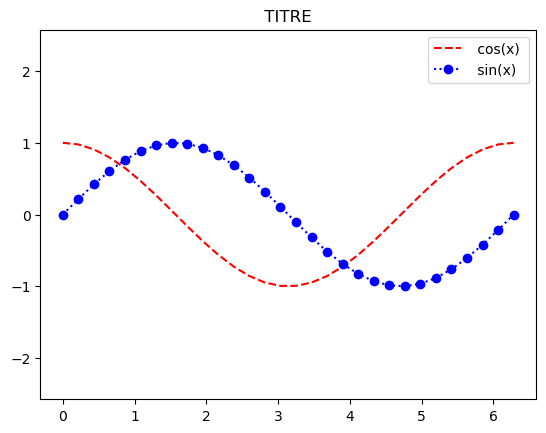

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace (0 , 2*np.pi , 30)
y1 = np.cos ( x )
y2 = np.sin ( x )
plt.plot(x , y1 , "r--" , label = " cos(x) " )
plt.plot (x , y2 , "b:o" , label = " sin(x) " )
plt.axis ( "equal" )
plt.legend ()
plt.title ( " TITRE " )
plt.show ()

### Tracer en 3D

In [21]:
from mpl_toolkits.mplot3d import Axes3D # importation d’un module de tracé 3D

### Afficher plusieurs tracés dans la même figure : _subplot_

La fonction _subplot()_ permet d’organiser différents tracés à l’intérieur d’une grille d’affichage. Il faut spécifier le nombre de lignes, le nombre de colonnes ainsi que le numéro du tracé.
Exemple :

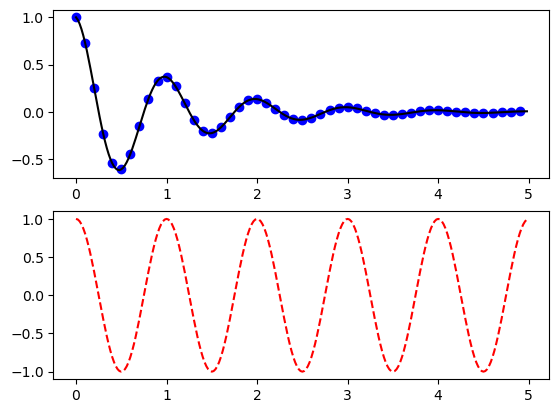

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(t) :
  return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange (0.0 , 5.0 , 0.1)
t2 = np.arange (0.0 , 5.0 , 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), "bo" )
plt.plot (t2 , f(t2) , "k" )

plt.subplot(212)
plt.plot (t2, np.cos(2*np.pi * t2 ) , "r--" )
plt.show()

## 3 OpenCV-Python (lecture et traitement d'images)

### 3.1 Chargement d’une matrice de pixels

Nous allons faire nos premiers essais avec la photo de Lena (renommée Lenna par les Américains), qui est un classique historique des chercheurs en traitement d’images (aussi téléchargeable sur la page https://en.wikipedia.org/wiki/Lenna). L'image Lena.png se trouve dans le même répertoire de ce Notebook.
Exécutez la cellule suivante :

In [23]:
import cv2 as cv
matrice = cv.imread ( "Lena.png" ) # charge le fichier dans une matrice de pixels couleur
print ( matrice.shape ) # affiche les dimensions de la matrice
print ( matrice [0 ,0]) # accède à la valeur du premier pixel

(440, 440, 3)
[124 136 226]


Il doit s’afficher :

```
(440,440,3)
[124 136 226]
```

En effet, l’image chargée par la fonction _imread_ fait 440 lignes sur 440 colonnes, avec chaque pixel stocké sur 3 octets (car c’est une image couleur en triplet RVB). Ensuite s’affiche la valeur du pixel de la ligne 0 colonne 0 qui est le triplet ```[124 136 226]```.

*NB*: OpenCV gère les valeurs des pixels non pas dans l’ordre RVB, mais à l’inverse dans l’ordre BVR, donc 226 est ici la composante de rouge du pixel de coordonnées (0,0).

Pour convertir l’image couleur précédente en matrice de pixels en niveaux de gris, on peut ajouter les instructions suivantes :

In [24]:
matG = cv.cvtColor ( matrice , cv.COLOR_BGR2GRAY ) # conversion des triplets BVR en gris
print ( matG.shape )
print ( matG[0 ,0])

(440, 440)
162


La nouvelle matrice fait aussi 440 lignes par 440 colonnes, mais sur de simples octets. Et la couleur RVB du pixel a été convertie en 162, qui correspond à la luminance. (La formule de la composante Y dans l’espace des couleurs YUV utilisée est : ```Y = 0.299 ∗ R + 0.587 ∗ G + 0.114 ∗ B```).

**NB** : Il existe un paramètre de la fonction _imread_ qui permet de charger une image directement dans une matrice de niveaux de gris : la valeur 0 ajoutable en second paramètre équivalent à _cv.IMREAD GRAYSCALE_. Cependant, cette fonction n’utilise pas exactement la même formule de conversion en luminance.

In [25]:
matrice = cv.imread ( "Lena.png",0 ) # charge le fichier dans une matrice de pixels gris

### 3.2 Enregistrement d’une matrice de pixels

L'appel de la fonction _imwrite_ enregistre un fichier contenant la matrice de pixels, selon le type de matrice (niveaux de gris, ou couleurs) et selon le format indiqué par le nom choisi (ici PNG, mais on pourrait aussi choisir JPEG en terminant le nom du fichier par _.jpg_).

In [26]:
cv.imwrite ( "resultat.jpg" , matG ) # enregistre la matrice dans un fichier du nom indiqué

True

### 3.3 Visualisation d’une matrice de pixels

Il serait possible de visualiser l’image enregistrée grâce à un logiciel de traitement d’images (par exemple GIMP). Il est cependant aussi possible d’afficher plus sommairement les images directement depuis le programme Python en utilisant la bibliothèque **Matplotlib**.

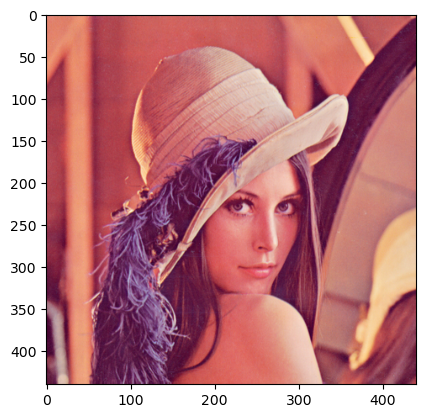

In [27]:
matrice2 = cv.imread("Lena.png") # charge le fichier dans une matrice de pixels couleur
plt.imshow( matrice2[... , :: -1]) # affiche la matrice de triplets RVB
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur (si utilisée dans un IDE)

Quelques remarques sur l’affichage par plt.imshow() :
Comme la bibliothèque **Matplotlib** considère les images couleur en triplets RVB et qu’au contraire la bibliothèque **OpenCV** les gère en ordre inverse, en triplets BVR, il faut inverser l’ordre de tous les triplets, ce que fait l’indexation utilisant ::-1.
On aurait pu obtenir le même résultat en utilisant la fonction de conversion :

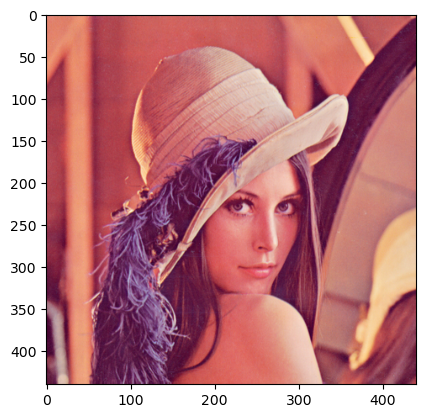

In [28]:
plt.imshow(cv.cvtColor( matrice2, cv.COLOR_BGR2RGB)) # affiche la matrice de triplets RVB

Quand la matrice n’est pas en couleur, mais en niveaux de gris, il faut préciser d’utiliser une palette (_colormap_) de
gris :

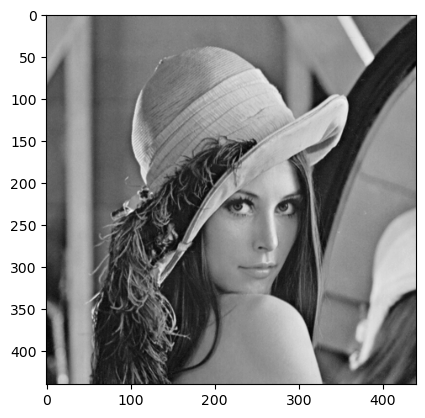

In [29]:
matG = cv.imread ( "Lena.png" , 0) # charge le fichier dans une matrice de pixels gris
plt.imshow ( matG , cmap = 'gray') # affiche la matrice de niveaux de gris
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

### 3.4 Modification d’une matrice de pixels

#### 3.4.1 Exemple 1

Ajoutons une ligne verticale blanche (en colonne 100) sur une image :

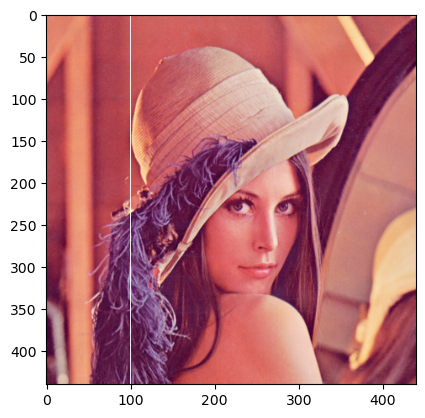

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread ( "Lena.png" ) # charge le fichier dans une matrice de pixels couleur

for i in range (0 , image.shape [0]) : # pour toutes les lignes i de l’image
  image[i,100] = [255 , 255 , 255] # insère du blanc en ligne i colonne 100

plt.imshow ( image[... , :: -1])
plt.show()

```image[i,j]``` permet donc d’accéder à la valeur du pixel aux coordonnées ```(i,j)```.
La syntaxe d’indexation ```image[i,j]``` de _Python_ permet beaucoup plus qu’accéder à un simple pixel : elle permet en fait d’extraire une sous-partie de la matrice de pixels et son utilisation pour accéder à un seul pixel, ce qui peut être un usage peu optimal. C’est pourquoi il existe des opérations spécialisées pour accéder à un seul pixel :
* En lecture : ```image.item(i,j)``` fournit la valeur du pixel en ```(i,j)``` ;
* En écriture : ```image.itemset((i,j),valeur)``` permet d’affecter la valeur souhaitée au pixel ```(i,j)```.
Cependant, nous n’utiliserons pas cette syntaxe spécialisée dans la suite de nos exemples pour conserver une lecture aisée et légère des programmes.

#### 3.4.2 Exemple 2

Modifions les composantes couleur d’une image : le quart supérieur gauche effacera la première composante de chaque triplet, le quart supérieur droit effacera la deuxième composante de chaque triplet, le quart inférieur gauche effacera la troisième composante, et le quart inférieur droit de l’image restera intact tel quel.

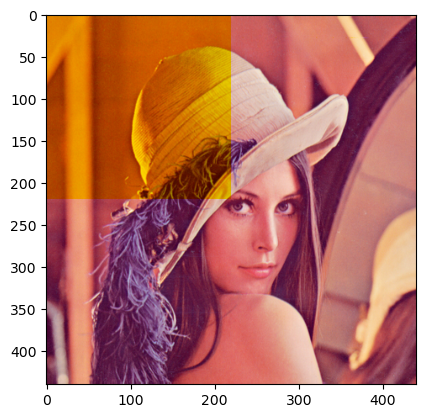

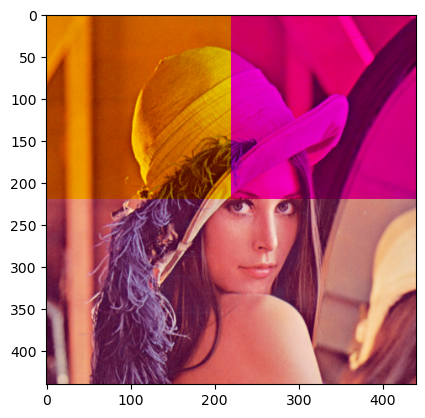

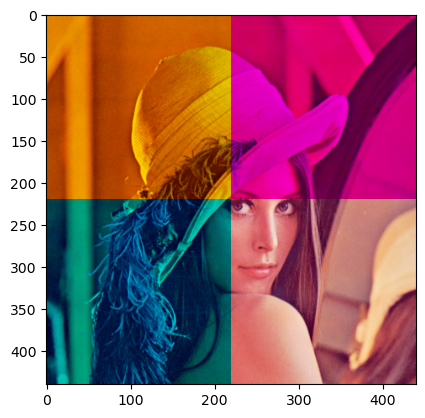

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread( "Lena.png" ) # charge le fichier dans une matrice de pixels couleur

for i in range (0 , image.shape [0]//2) : # // est la division entière par 2
  for j in range (0 , image.shape [1]//2) :
    image [i ,j ,0] = 0 # efface la 1re composante, bleue, du triplet BVR
plt.imshow ( image [... , :: -1])
plt.show ()

for i in range (0 , image.shape [0]//2) :
  for j in range ( image.shape [1]//2 , image.shape [1]) :
    image [i ,j ,1] = 0 # efface la 2e composant, verte, du triplet BVR
plt.imshow ( image [... , :: -1])
plt.show()

for i in range ( image.shape [0]//2 , image.shape [0]) :
  for j in range (0 , image . shape [1]//2) :
    image[i ,j ,2] = 0 # efface la 3e composante, rouge , du triplet BVR
plt.imshow ( image [... , :: -1])
plt.show ()

On constate sur le résultat que les couleurs de la photo originale de Lena contenaient essentiellement des mélanges de rouge et de vert (et très peu de bleu) car :
* La suppression de la composante bleue ne change pas beaucoup les couleurs;
* La suppression du vert fait apparaître une dominante de rouge;
* La suppression du rouge faire apparaître une dominante de vert.
```image[i,j,0]``` permet donc d’accéder à la composante d’indice 0 de la valeur du pixel aux coordonnées ```(i,j)``` $\rightarrow$ c’est
la composante bleue, et donc 1 pour le vert et 2 pour le rouge.

#### 3.4.3 Exemple 3

Passons d’une photo noir et blanc à son négatif.
Cette opération, dite d’inverse vidéo, renverse l’ordre des niveaux de gris de l’image (le noir devient blanc, le blanc devient noir, etc.).

Plutôt que de répéter l’opération ```[i,j] = 255 - image[i,j]``` en chaque pixel, on a utilisé ici les opérations matricielles pour faire globalement cette opération en une seule instruction, de manière plus concise et plus efficace.

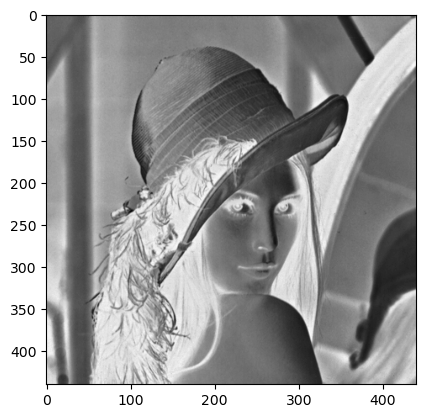

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread ( "Lena.png" , 0) # charge le fichier dans une matrice de pixels gris
image = 255 - image
plt.imshow ( image , cmap='gray')
plt.show()

### 3.5 Vos premières fonctions de traitement d'images en Python

Dans un premier temps, sans utiliser les fonctions predefinies de *OpenCV*, écrivez vos premières fonctions en Python permettant d'effectuer les calculs suivants sur une image d'entrée et testez-les sur _Lena.png_ et sur des images de votre choix.

1. Augmenter/diminuer le niveau de luminosité d'une image d'entrée *img* selon un paramètre *_lambda* (*_lambda* peut être une valeur negative ou positive entre *-255* et *255*).
2. Calculer le négatif d'une image en RVB.
3. Redimensionner une image par un facteur $x$. Par exemple, pour l'image _Lena.png_, si $x=0.5$, l'image de sortie sera de dimension $220 \times 220$. Si $x=1.3$, la sortie sera de dimension $572 \times 572$. Et, si $x=2.0$, la sortie sera de dimension $880 \times 880$.
4. Faire pivoter une image de $90$, $180$ ou $270$ degrés.

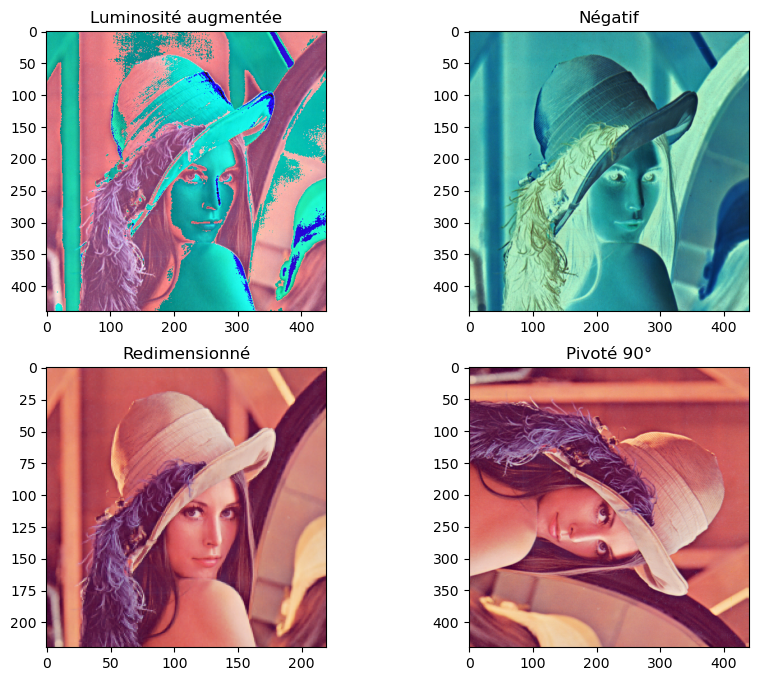

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("Lena.png") # Remplacez par une image de votre choix

def changer_luminosite(img, _lambda):
    resultat = np.clip(img + _lambda, 0, 255).astype(np.uint8)
    return resultat

def negatif_rgb(img):
    resultat = 255 - img
    return resultat

def redimensionner(img, x):
    new_size = (int(img.shape[1] * x), int(img.shape[0] * x))
    resultat = cv.resize(img, new_size, interpolation=cv.INTER_LINEAR)
    return resultat

def pivoter(img, degrees):
    if degrees == 90:
        resultat = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    elif degrees == 180:
        resultat = cv.rotate(img, cv.ROTATE_180)
    elif degrees == 270:
        resultat = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    else:
        raise ValueError("Degrees must be 90, 180, or 270")
    return resultat

# Test the functions
img_lum = changer_luminosite(img, 50)
img_neg = negatif_rgb(img)
img_resized = redimensionner(img, 0.5)
img_rotated = pivoter(img, 90)

# Display the results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img_lum, cv.COLOR_BGR2RGB))
plt.title('Luminosité augmentée')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img_neg, cv.COLOR_BGR2RGB))
plt.title('Négatif')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img_resized, cv.COLOR_BGR2RGB))
plt.title('Redimensionné')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(img_rotated, cv.COLOR_BGR2RGB))
plt.title('Pivoté 90°')

plt.show()

### 3.6 Fausses couleurs

Étant donnée l'image en niveaux de gris ```einstein.png``` (de dimension ```186 × 182```) prise avant la popularisation des caméras RVB, on souhaite calculer une nouvelle image ```I_rvb``` en attribuant des "fausses couleurs" aux pixels de l'image originale. Plus précisément, l'image résultante ```I_rgb``` est représentée par un tableau à trois dimensions (```186 × 182 x 3```) où, pour chaque pixel à la ligne ```i``` et colonne ```j```, le pixel ```I_rgb[i,j]``` est :

- <span style="color:blue">Blue</span> si le niveau de gris de ```I[i,j]``` est inférieur ou égal à ```85```
- <span style="color:green">Vert</span> si le niveau de gris de ```I[i,j]``` est entre ```86``` et ```170```
- <span style="color:red">Rouge</span> si le niveau de gris de ```I[i,j]``` est supérieur à ```170```

Complétez le code suivant afin d'obtenir l'image en RVB affichée ci-dessous.

![Image](einstein.png) ![Image](einstein_rvb.png)

(182, 186)


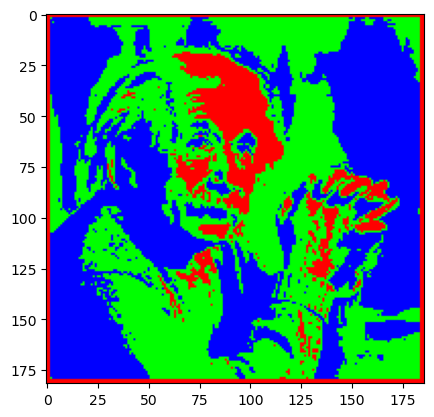

(182, 186, 3)


In [43]:
image = cv.imread("einstein.png",0)
# print dimensions
print(image.shape)
# Crée une image des mêmes dimensions que l'image originelle
image_rvb = np.zeros(shape=(image.shape[0], image.shape[1], 3)).astype('uint8')

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] <= 85:
            image_rvb[i, j] = [0, 0, 255]  # Blue
        elif 86 <= image[i, j] <= 170:
            image_rvb[i, j] = [0, 255, 0]  # Green
        else:
            image_rvb[i, j] = [255, 0, 0]  # Red
plt.imshow(image_rvb)
plt.show()
print(image_rvb.shape)